In [2]:
import pandas as pd 
import numpy as np 
df1=pd.read_csv('./tmdb_5000_credits.csv')
df2=pd.read_csv('./tmdb_5000_movies.csv')

In [3]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

In [4]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
C= df2['vote_average'].mean()
C

6.092171559442011

In [6]:
m= df2['vote_count'].quantile(0.9)
m

1838.4000000000015

In [7]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 23)

In [8]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [9]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [10]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5, 1.0, 'Popular Movies')

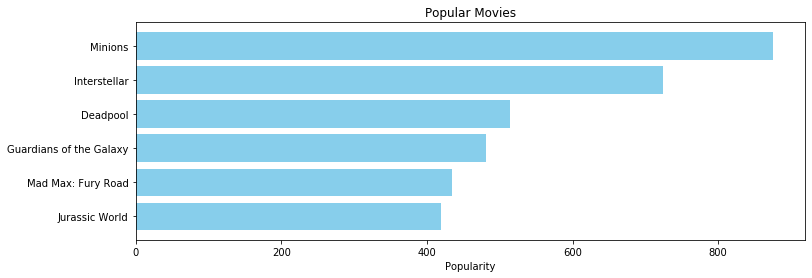

In [39]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

In [12]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [13]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

In [14]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [40]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

In [55]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
#     print(len(sim_scores))
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

In [56]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [18]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [19]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [20]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [21]:
# Define new director, cast, genres and keywords features that are in a suitable form.
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [22]:
# Print the new features of the first 3 films
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [23]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [24]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [44]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

In [45]:
df2.soup

0       cultureclash future spacewar samworthington zo...
1       ocean drugabuse exoticisland johnnydepp orland...
2       spy basedonnovel secretagent danielcraig chris...
3       dccomics crimefighter terrorist christianbale ...
4       basedonnovel mars medallion taylorkitsch lynnc...
                              ...                        
4798    unitedstates–mexicobarrier legs arms carlosgal...
4799     edwardburns kerrybishé marshadietlein edwardb...
4800    date loveatfirstsight narration ericmabius kri...
4801       danielhenney elizacoupe billpaxton danielhsia 
4802    obsession camcorder crush drewbarrymore brianh...
Name: soup, Length: 4803, dtype: object

In [26]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [46]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [48]:
cosine_sim2.shape

(4803, 4803)

In [28]:
# Reset index of our main DataFrame and construct reverse mapping as before
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

In [57]:
get_recommendations('Toy Story', cosine_sim2)

42                                            Toy Story 3
343                                           Toy Story 2
40                                                 Cars 2
533                                         Monster House
1983                                     Meet the Deedles
3403    Alpha and Omega: The Legend of the Saw Tooth Cave
927                             Christmas with the Kranks
120                           Madagascar: Escape 2 Africa
725                                        The Shaggy Dog
1451                                                 Zoom
Name: title, dtype: object

In [38]:
df2.sort_values(by='id')

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,status,tagline,title,vote_average,vote_count,tittle,cast,crew,director,soup
3766,3766,4000000,"[crime, comedy]",NaN,5,"[hotel, newyear'seve, witch]",en,Four Rooms,It's Ted the Bellhop's first night on the job....,22.876230,...,Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,530,Four Rooms,"[timroth, antoniobanderas, jenniferbeals]","[{'credit_id': '52fe420dc3a36847f800012d', 'de...",allisonanders,hotel newyear'seve witch timroth antoniobander...
2912,2912,11000000,"[adventure, action, sciencefiction]",http://www.starwars.com/films/star-wars-episod...,11,"[android, galaxy, hermit]",en,Star Wars,Princess Leia is captured and held hostage by ...,126.393695,...,Released,"A long time ago in a galaxy far, far away...",Star Wars,8.1,6624,Star Wars,"[markhamill, harrisonford, carriefisher]","[{'credit_id': '52fe420dc3a36847f8000437', 'de...",georgelucas,android galaxy hermit markhamill harrisonford ...
328,328,94000000,"[animation, family]",http://movies.disney.com/finding-nemo,12,"[fathersonrelationship, harbor, underwater]",en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",85.688789,...,Released,"There are 3.7 trillion fish in the ocean, they...",Finding Nemo,7.6,6122,Finding Nemo,"[albertbrooks, ellendegeneres, alexandergould]","[{'credit_id': '52fe420ec3a36847f80006b1', 'de...",andrewstanton,fathersonrelationship harbor underwater albert...
809,809,55000000,"[comedy, drama, romance]",NaN,13,"[vietnamveteran, hippie, mentallydisabled]",en,Forrest Gump,A man with a low IQ has accomplished great thi...,138.133331,...,Released,"The world will never be the same, once you've ...",Forrest Gump,8.2,7927,Forrest Gump,"[tomhanks, robinwright, garysinise]","[{'credit_id': '52fe420ec3a36847f800076b', 'de...",robertzemeckis,vietnamveteran hippie mentallydisabled tomhank...
2516,2516,15000000,[drama],http://www.dreamworks.com/ab/,14,"[malenudity, femalenudity, adultery]",en,American Beauty,"Lester Burnham, a depressed suburban father in...",80.878605,...,Released,Look closer.,American Beauty,7.9,3313,American Beauty,"[kevinspacey, annettebening, thorabirch]","[{'credit_id': '52fe420ec3a36847f8000809', 'de...",sammendes,malenudity femalenudity adultery kevinspacey a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4625,4625,0,[horror],NaN,426067,[],en,Midnight Cabaret,A Broadway producer puts on a play with a Devi...,0.001389,...,Released,The hot spot where Satan's waitin'.,Midnight Cabaret,0.0,0,Midnight Cabaret,"[lisahartcarroll, michaeldesbarres, pauldrake]","[{'credit_id': '582a4cdb9251417b1803dd47', 'de...",pecedingo,lisahartcarroll michaeldesbarres pauldrake pe...
4255,4255,0,"[comedy, family, drama]",http://www.growingupsmithmovie.com,426469,[],en,Growing Up Smith,"In 1979, an Indian family moves to America wit...",0.710870,...,Released,It’s better to stand out than to fit in.,Growing Up Smith,7.4,7,Growing Up Smith,"[roniakurati, brightonsharbino, jasonlee]","[{'credit_id': '582e0bdfc3a368772600b6c1', 'de...",franklotito,roniakurati brightonsharbino jasonlee franklo...
4051,4051,0,"[thriller, drama]",NaN,433715,"[christianfilm, sextrafficking]",en,8 Days,"After sneaking to a party with her friends, 16...",0.015295,...,Released,She never knew it could happen to her...,8 Days,0.0,0,8 Days,"[nicolesmolen, kimbaldwin, arianastephens]","[{'credit_id': '58713acfc3a3684f0a00a9ac', 'de...",jacobooyens,christianfilm sextrafficking nicolesmolen kimb...
3670,3670,0,[family],NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,...,Released,NaN,Running Forever,0.0,0,Running Forever,[],[],,family
